# Import libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

ModuleNotFoundError: No module named 'yellowbrick'

#Load data 
Tên data: customer-segmentation.csv \
Gồm : 2240 hàng × 29 cột



**People**

ID: Customer's unique identifier \
Year_Birth: Customer's birth year \
Education: Customer's education level \
Marital_Status: Customer's marital status \
Income: Customer's yearly household income \
Kidhome: Number of children in customer's household \
Teenhome: Number of teenagers in customer's household \
Dt_Customer: Date of customer's enrollment with the company \
Recency: Number of days since customer's last purchase \
Complain: 1 if customer complained in the last 2 years, 0 otherwise \

**Products**

MntWines: Amount spent on wine in last 2 years \
MntFruits: Amount spent on fruits in last 2 years \
MntMeatProducts: Amount spent on meat in last 2 years \
MntFishProducts: Amount spent on fish in last 2 years \
MntSweetProducts: Amount spent on sweets in last 2 years \
MntGoldProds: Amount spent on gold in last 2 years \

**Promotion**

NumDealsPurchases: Number of purchases made with a discount \
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise \
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise \
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise \
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise \
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise \
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise \

**Place**

NumWebPurchases: Number of purchases made through the company’s web site \
NumCatalogPurchases: Number of purchases made using a catalogue \
NumStorePurchases: Number of purchases made directly in stores \
NumWebVisitsMonth: Number of visits to company’s web site in the last month

In [2]:
data= pd.read_csv("customer-segmentation.csv",sep="\t")
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.shape

(2240, 29)

#Data Cleaning

In [4]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Từ kết quả trên, chúng ta có thể kết luận và lưu ý rằng:

Có những giá trị bị thiếu trong thu nhập \
Dt_Customer cho biết ngày khách hàng tham gia nhưng không được phân tích cú pháp thành DateTime \
Có một số feature phân loại trong khung dữ liệu; vì có một số tính năng trong dtype: object) \
=>  Vì vậy, chúng ta sẽ cần phải mã hóa chúng thành dạng số.


**Chúng ta tiến hành loại bỏ các hàng có dữ liệu bị thiếu**

In [5]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


**Đưa feature Dt_customer về dạng DateTime**

In [6]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


**Tạo một featue ("Customer_For") về số ngày khách hàng bắt đầu mua sắm trong cửa hàng so với ngày được ghi cuối cùng**

In [7]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

**Sau đây chúng ta sẽ khám phá các Uniqe value trong các feature để có được ý tưởng rõ ràng về dữ liệu.**

In [8]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


Trong phần tiếp theo, tôi sẽ thực hiện các bước sau để thiết kế một số tính năng mới:

Trích xuất "Age" của khách hàng theo "Year_Birth" cho biết năm sinh của người tương ứng. \
Tạo một feature "Spent" cho biết tổng số tiền khách hàng đã chi tiêu trong các danh mục khác nhau trong khoảng thời gian hai năm. \
Tạo một tính năng khác "Living_With" ngoài "Marital_Status" để bóc tách hoàn cảnh sống của các cặp vợ chồng. \
Tạo feature "Children" để biểu thị tổng số trẻ em trong một hộ gia đình, đó là trẻ em và thanh thiếu niên. \
Để hiểu rõ hơn về hộ gia đình, hãy tạo tính năng cho biết "Family_Size" \
Tạo một tính năng "Is_Parent" để biểu thị trạng thái làm cha mẹ \
Cuối cùng, tôi sẽ tạo ba danh mục trong "Education_" bằng cách đơn giản hóa số lượng giá trị của nó. \
Bỏ một số tính năng thừa

In [9]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [11]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


Các số liệu thống kê trên cho thấy một số khác biệt về Thu nhập trung bình và Tuổi và Thu nhập tối đa và độ tuổi.

Có một lưu ý rằng độ tuổi tối đa là 128 tuổi, Như  đã tính toán độ tuổi sẽ là ngày hôm nay (tức là năm 2021) và dữ liệu đã cũ.

Vì vậy chúng ta phải xem xét tầm nhìn rộng hơn của dữ liệu.

**Plot data**

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

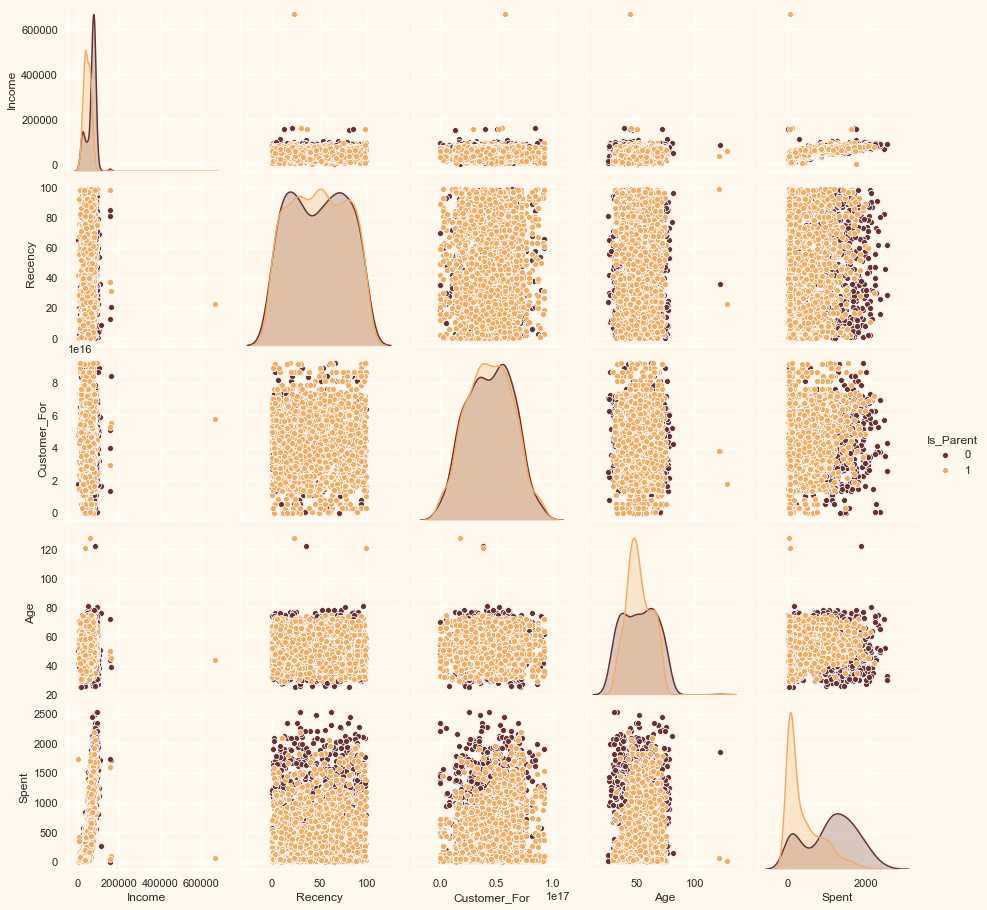

In [10]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

Có một số outlier trong các feature Income và Age. \
=> Tôi sẽ xóa các outlier trong dữ liệu.

In [11]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


**Tiếp theo, chúng ta hãy xem xét correlation giữa các features.**

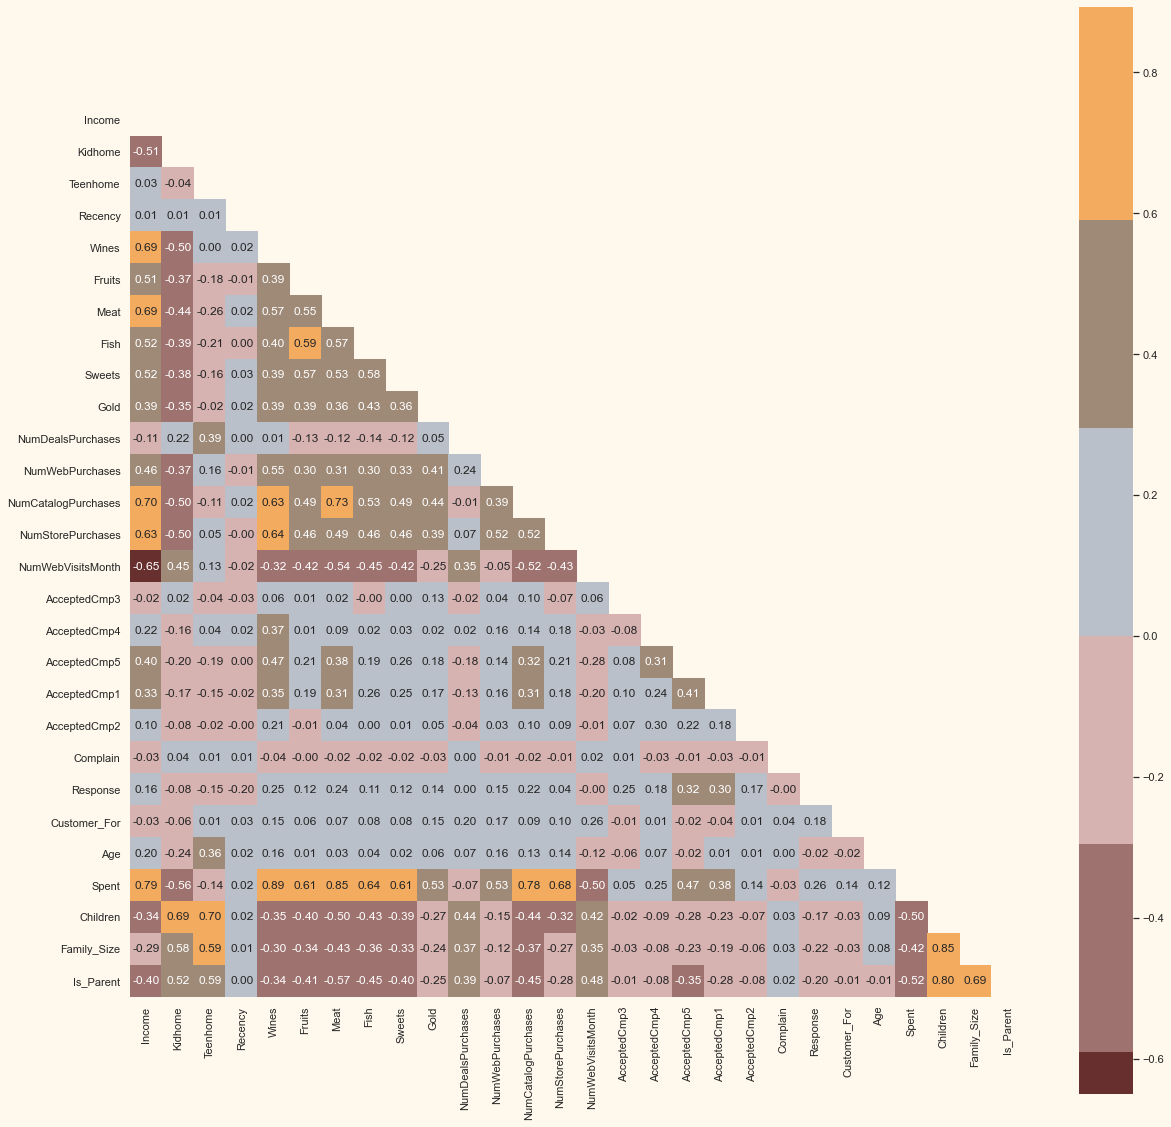

In [12]:
#correlation matrix
corrmat= data.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# Create a custom divergin palette

plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True,mask=mask, cmap=cmap,fmt='.2f', center=0, square=True)

# Data visualisation using Autoviz

AUTOVIZ install

In [15]:
!pip install autoviz

In [16]:
! pip install xlrd

In [13]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('/content/customer-segmentation.csv',sep="\t")

Imported AutoViz_Class version: 0.0.85. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
    pandas ascii encoder does not work for this file. Continuing...
    pandas utf-8 encoder does not work for this file. Continuing...
    pandas iso-8859-1 encoder does not work for this file. Continuing...
    pandas cp1252 encoder does not work for this file. Continuing...
    pandas latin1 encoder does not work for this file. Continuing...
Not able to read or load file. Please check your inputs and try again...


# Data visualisation

In [14]:
data['Education'].value_counts()

Graduate         1115
Postgraduate      845
Undergraduate     252
Name: Education, dtype: int64

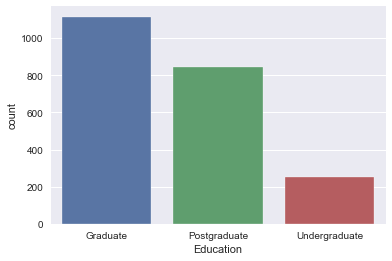

In [15]:
sns.countplot(x = 'Education' , data = data)
plt.show()

=> Chưa tốt nghiệp chiếm số lượng thấp nhất


In [16]:
data['Living_With'].value_counts()

Partner    1428
Alone       784
Name: Living_With, dtype: int64

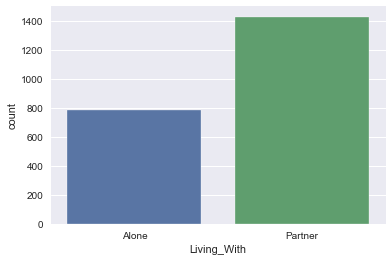

In [17]:
sns.countplot( x = 'Living_With',data = data)
plt.show()

=> Phần đông là người đã lập gia đình

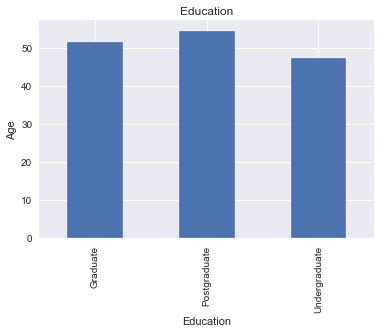

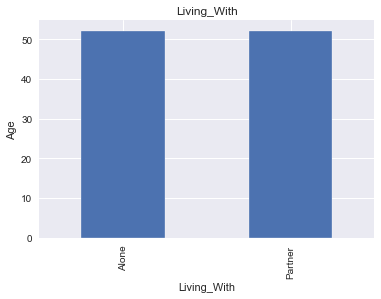

In [18]:
obj = ['Education','Living_With']
for i in obj:
    data=data.copy()
    data.groupby(i)['Age'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Age')
    plt.title(i)
    plt.show()

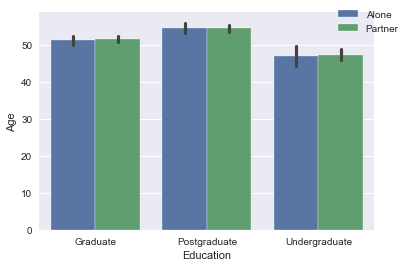

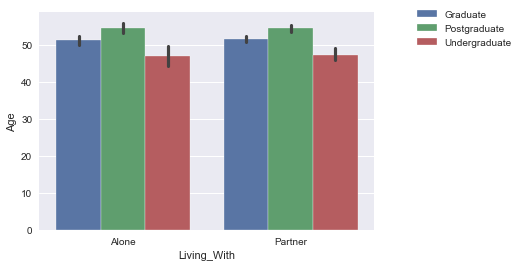

In [19]:
# I found no relations
for i in range(len(obj)):
    for j in range(2):
        x = obj[i]
        if obj[j] != x:
            sns.barplot(x= x,y='Age',hue=obj[j],data=data)
            plt.legend(bbox_to_anchor=(1.1, 1.05))
            plt.show()

In [32]:
df7 = data.copy()

In [20]:
for i in range(len(obj)):
    x='Living_With'
    for j in range(1):
        if obj[i] != x:
            sns.barplot(x= x,y='Age',hue=obj[i],data=df7)
            sns.set(rc={'figure.figsize':(11,12)})
            plt.show()

NameError: name 'df7' is not defined

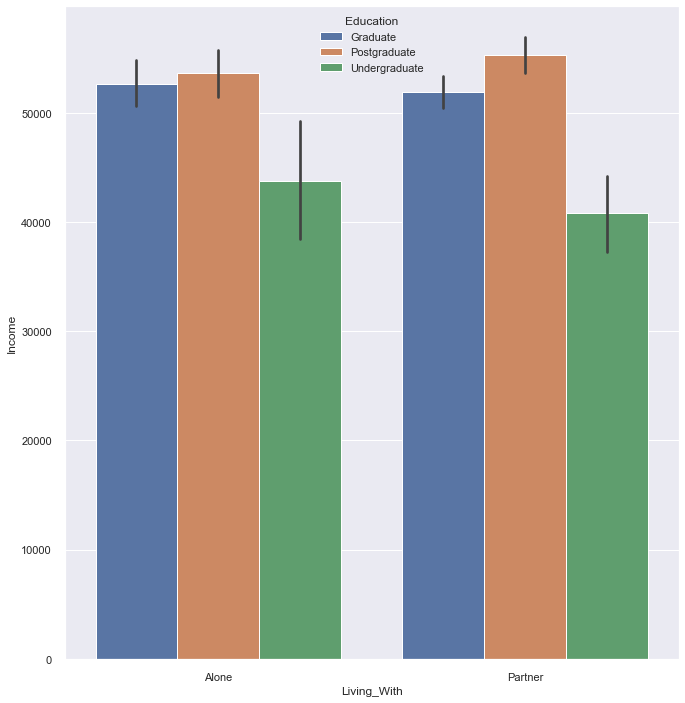

In [26]:
for i in range(len(obj)):
    x='Living_With'
    for j in range(1):
        if obj[i] != x:
            sns.barplot(x= x,y='Income',hue=obj[i],data=df7)
            sns.set(rc={'figure.figsize':(11,12)})
            plt.show()

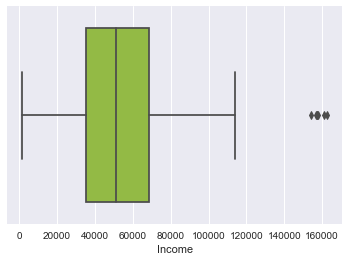

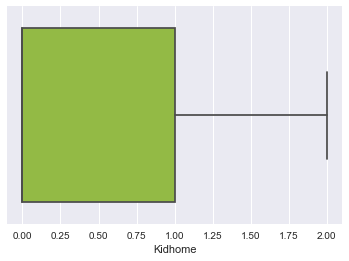

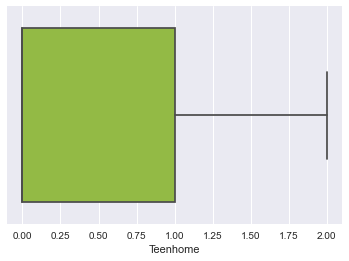

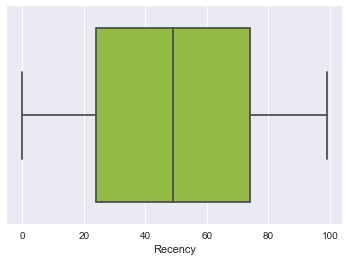

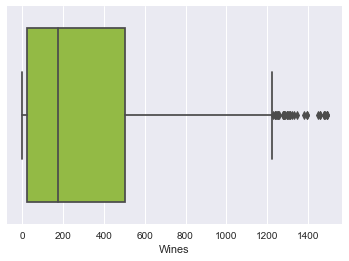

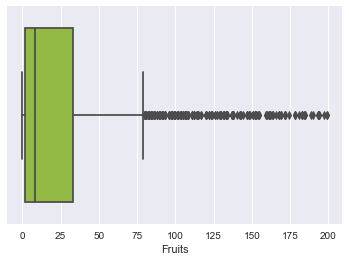

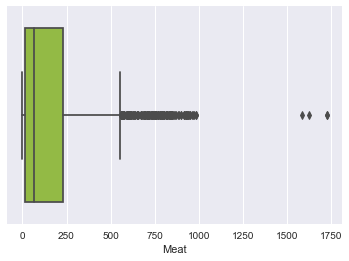

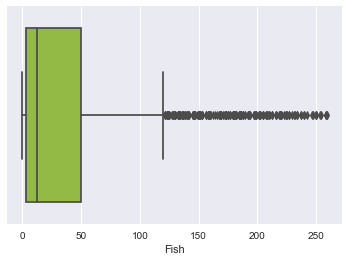

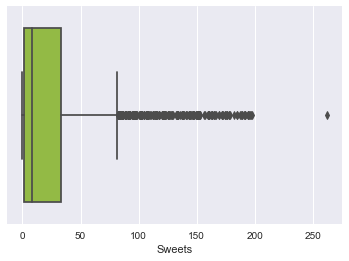

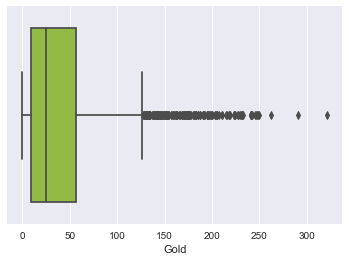

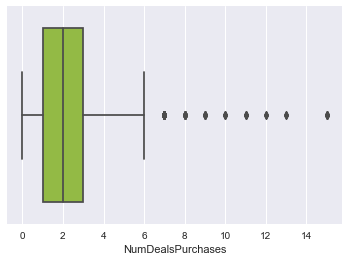

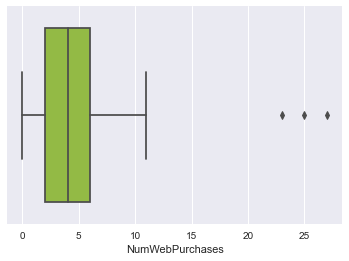

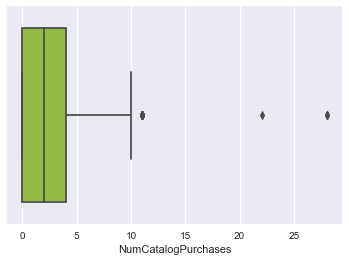

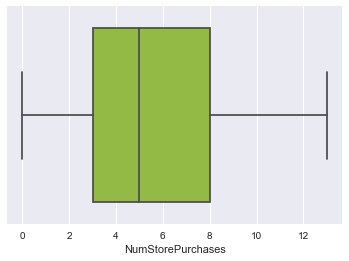

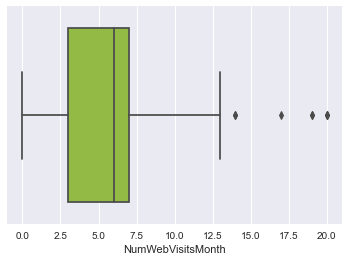

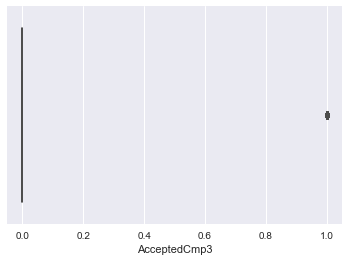

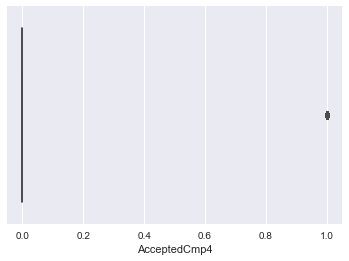

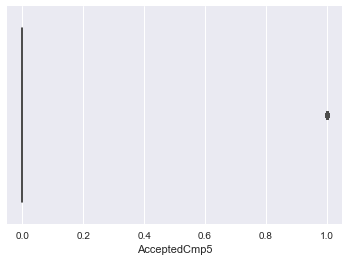

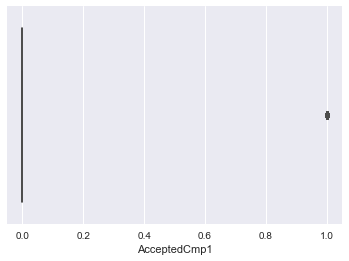

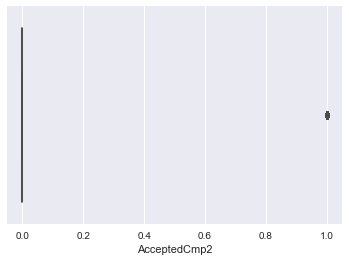

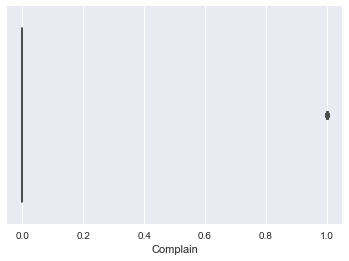

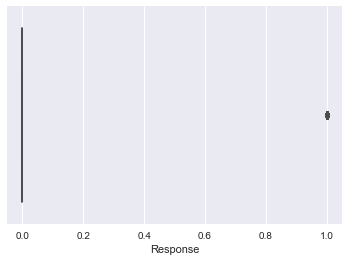

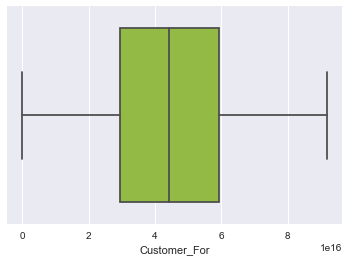

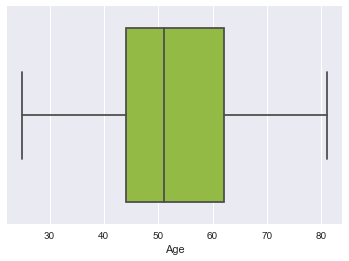

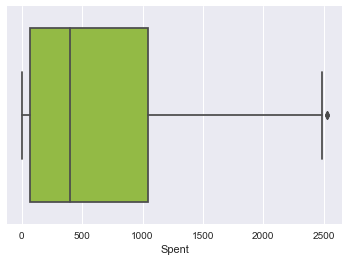

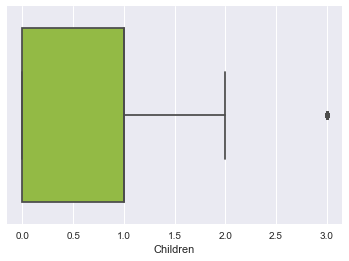

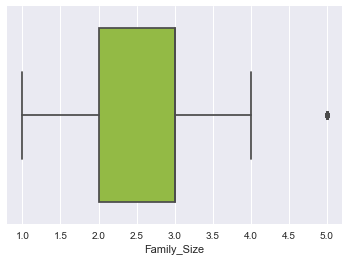

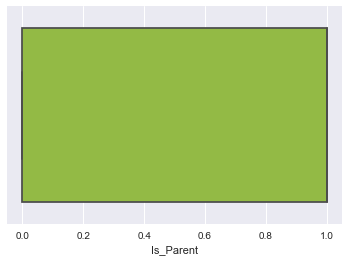

In [21]:
y = data.drop(['Education','Living_With'],axis = 1)
for i in y.columns:
    sns.boxplot(x = i, data = y,color = 'yellowgreen')   
    plt.xlabel(i)
    plt.show()

In [22]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in y.columns:
    count_outliers(data,i)

There are outliers in Income
Count of outliers are: 7
No outliers in Kidhome
No outliers in Teenhome
No outliers in Recency
There are outliers in Wines
Count of outliers are: 35
There are outliers in Fruits
Count of outliers are: 245
There are outliers in Meat
Count of outliers are: 173
There are outliers in Fish
Count of outliers are: 222
There are outliers in Sweets
Count of outliers are: 246
There are outliers in Gold
Count of outliers are: 204
There are outliers in NumDealsPurchases
Count of outliers are: 84
There are outliers in NumWebPurchases
Count of outliers are: 3
There are outliers in NumCatalogPurchases
Count of outliers are: 23
No outliers in NumStorePurchases
There are outliers in NumWebVisitsMonth
Count of outliers are: 8
There are outliers in AcceptedCmp3
Count of outliers are: 163
There are outliers in AcceptedCmp4
Count of outliers are: 164
There are outliers in AcceptedCmp5
Count of outliers are: 161
There are outliers in AcceptedCmp1
Count of outliers are: 142
There